In [1]:
pwd

'/Users/rodrigorayas/OneDrive - ITESO/ITESO/10mo semestre/Machine Learning'

#alumno: Rodrigo Rayas Solorzano

#materia: Machile Learning P2022

#profesor: Juan Antonio Vega

1.Read Data

In [2]:
#Importing datasets from sklearn and fashion mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame= False)
import pandas as pd
ftrain = pd.read_csv("mnist-data/fashion-mnist_train.csv", dtype=int)
ftest = pd.read_csv("mnist-data/fashion-mnist_test.csv", dtype=int) # csv pandas df

In [3]:
#mnist.keys()
ftest.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [4]:
#mnist["data"]
ftest["label"]

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [5]:
#mnist["target"]
ftest["pixel3"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    3
9999    0
Name: pixel3, Length: 10000, dtype: int64

In [6]:
mnist.data.shape

(70000, 784)

2.Data Preprocessing

In [7]:
X_ftrain = ftrain.drop("label", axis=1)
Y_ftrain = ftrain['label']

X_ftest = ftest.drop("label", axis=1)

Y_ftest = ftest[f'label']

In [8]:
X_ftrain.iloc[0:1,0:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

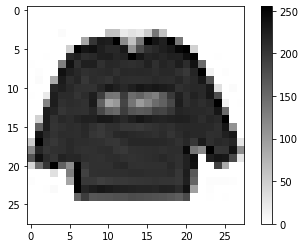

In [10]:
Prenda = X_ftrain.iloc[0:1,0:]
Prenda = np.array(Prenda)
Prenda = np.reshape(Prenda, (28,28,1))
plt.imshow(Prenda, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show

In [11]:
X, y = mnist["data"], mnist["target"]

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

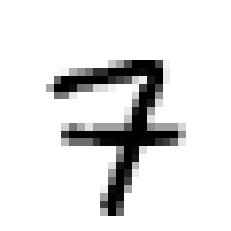

In [14]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

any_num = X[324]
any_digit_image = any_num.reshape(28,28)
plt.imshow(any_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
y[324]

'7'

In [17]:
y.shape

(70000,)

In [18]:
X_ftrain, X_ftest, Y_ftrain, Y_ftest = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
Y_ftest.shape

(10000,)

<function matplotlib.pyplot.show(close=None, block=None)>

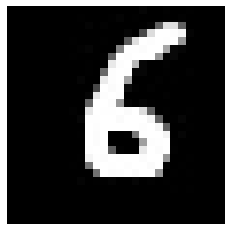

In [22]:
#Mostrat imagen de paint
%matplotlib inline

from PIL import Image
jpgfile = Image.open("mnist-data/testpaint.jpg").convert('L')

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.imshow(jpgfile, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show

In [23]:
img_array = np.array(jpgfile)

In [24]:
img_array.shape

(28, 28)

3.Model Creation

In [53]:

from sklearn import svm
my_model = svm.SVC()

#from sklearn.linear_model import LogisticRegression
#my_model = LogisticRegression(max_iter=100)

#from sklearn.ensemble import RandomForestClassifier
#my_model = RandomForestClassifier()

#from sklearn.neural_network import MLPClassifier
#my_model = MLPClassifier()

4.Adjust Model with Historic Data

In [54]:
my_model.fit(X_ftrain, Y_ftrain)

SVC()

5.Prediction for new Data

In [55]:
my_model.predict([any_num])

array(['7'], dtype=object)

In [56]:
Y_predict = my_model.predict(X_ftest)

In [57]:
Y_ftest[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

6.Visualization of Results

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(my_model, X_ftrain, Y_ftrain, cv=3, scoring="accuracy")

array([0.977 , 0.9738, 0.9739])

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_ftest, Y_predict)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_ftest, Y_predict)

0.9792

# Results
SVM = 0.9792
LogisticRegression = 0.9255
RandomForestClassifier = 0.9712
MLPClassifier = 0.9684
CNN = ?